# Load and Visualize HDF5 Dataset

This notebook shows how to load images from the HDF5 file created by `images_to_hdf5.py`

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## Load the HDF5 file

In [2]:
# Open the HDF5 file
h5_file = h5py.File('/projects/prjs1711/XAI4SFM/test_images.h5', 'r')

# Display basic info
print(f"Dataset split: {h5_file.attrs['split']}")
print(f"Number of classes: {h5_file.attrs['num_classes']}")
print(f"Number of images: {h5_file['images'].shape[0]}")
print(f"Image shape: {h5_file['images'].shape[1:]}")

Dataset split: test
Number of classes: 1000
Number of images: 50000
Image shape: (128, 128, 3)


## Visualize random images

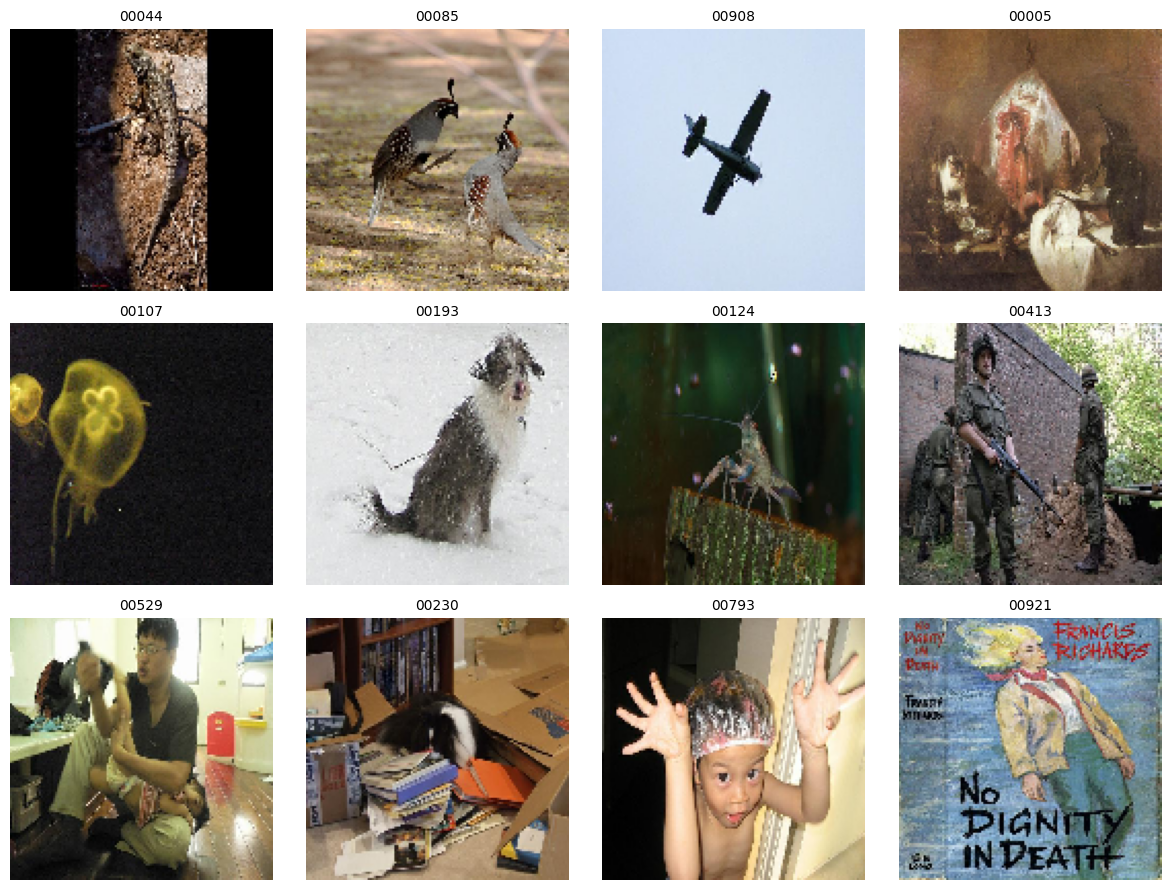

In [3]:
# Get class names
class_names = [name.decode('utf-8') for name in h5_file['class_names'][:]]

# Show 12 random images
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()

n_images = h5_file['images'].shape[0]
random_indices = np.random.choice(n_images, size=12, replace=False)

for i, idx in enumerate(random_indices):
    img = h5_file['images'][idx]
    label = h5_file['labels'][idx]
    class_name = class_names[label]
    
    axes[i].imshow(img)
    axes[i].set_title(f'{class_name}', fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Access individual images

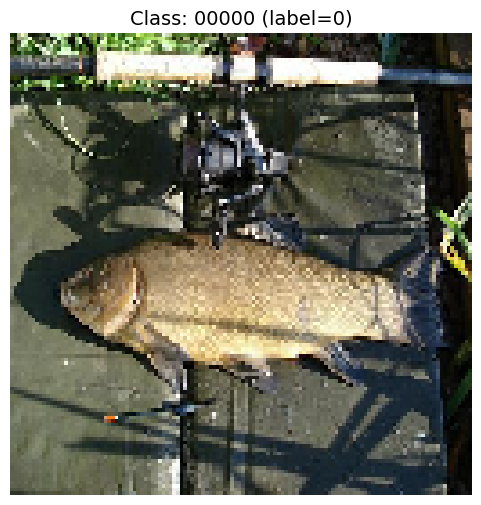

Image shape: (128, 128, 3)
Image dtype: uint8
Value range: [0, 255]


In [4]:
# Access a specific image by index
idx = 0
image = h5_file['images'][idx]
label = h5_file['labels'][idx]

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f'Class: {class_names[label]} (label={label})', fontsize=14)
plt.axis('off')
plt.show()

print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")
print(f"Value range: [{image.min()}, {image.max()}]")

## Get batch of images

In [5]:
# Load a batch of images (e.g., first 32)
batch_images = h5_file['images'][:32]
batch_labels = h5_file['labels'][:32]

print(f"Batch shape: {batch_images.shape}")
print(f"Labels: {batch_labels}")

Batch shape: (32, 128, 128, 3)
Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Close the file

In [6]:
h5_file.close()
print("HDF5 file closed")

HDF5 file closed
